In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
df = pd.read_csv("Resources/Autism.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [5]:
# Encode strings into binary format
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Used_App_Before_no,Used_App_Before_yes,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Select ML features    

In [6]:
# Set features. Start off with all inputs except 'Case No'
X = df.drop(columns=['Class_NO','Class_YES', 'Case No'])
y = df[['Class_NO','Class_YES']]
print(X.shape, y.shape)

(1117, 135) (1117, 2)


In [7]:
# Perform feature selection after grid search, and then I can run this cell, altering inputs
# NOTE: These are the features I ultimately selected after running ExtraTreeClassifier below Gridsearch
Xsel = df[['A5', 'A9', 'A6', 'A3', 'A4', 'A1', 'A2', 'A7', 'A10', 'A8', 'Score']]
y = df[['Class_NO','Class_YES']]
print(Xsel.shape, y.shape)

(1117, 11) (1117, 2)


## Create a Train Test Split     
*Use 'Class' for the y values*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xsel, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler*

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

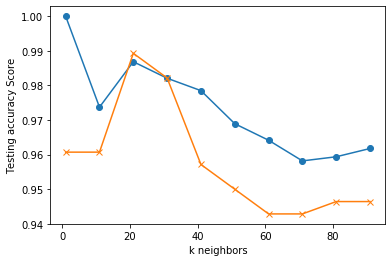

In [11]:
# Loop through different k values to see which has the highest accuracy

#KNN
from sklearn.neighbors import KNeighborsClassifier

# Set up empty arrays for our training and testing scores
train_scores = []
test_scores = []

# For loop 
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    train_score = knn.score(X_train_scaled, y_train_scaled)
    test_score = knn.score(X_test_scaled, y_test_scaled)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Note that k: 21 seems to be the best choice for this dataset

# Define the model
knn = KNeighborsClassifier(n_neighbors=21)

# Fit the model
gs = knn.fit(X_train_scaled, y_train_scaled)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

k=21 Test Acc: 0.989


In [13]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.986857825567503
Testing Data Score: 0.9892857142857143


In [14]:
# Print off parameters for the KNN model
print(gs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')


In [15]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Set up the parameters we want to check
param_grid = {'leaf_size': [1, 2, 5, 30, 36], 'n_neighbors': [11, 19, 21, 23, 51], 
             'p': [1, 2, 3, 6]}

# Define the grid
grid = GridSearchCV(knn, param_grid, verbose=3)

In [16]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.986, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.986, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................


C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.986, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.961, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.986, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.964, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.943, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.971, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=6 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=6, score=0.986, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=6 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.986, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.986, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=3, score=0.961, total=   0.1s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=3, score=0.946, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=3, score=0.971, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=6 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=6, score=0.982, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=6 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.982, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.964, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.986, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=3, score=0.964, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=3, score=0.946, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=3, score=0.971, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=6 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=6, score=0.982, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=6 ................................
[CV] .

[CV] ... leaf_size=30, n_neighbors=11, p=2, score=0.982, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=2, score=0.971, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=2, score=0.986, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=3, score=0.961, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=3, score=0.953, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=3, score=0.971, total=   0.1s
[CV] leaf_size=30, n_neighbors=11, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=6, score=0.982, total=   0.1s
[CV] leaf_size=30, n_neighbors=11, p=6 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=11, p=3, score=0.968, total=   0.1s
[CV] leaf_size=36, n_neighbors=11, p=3 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=3, score=0.953, total=   0.1s
[CV] leaf_size=36, n_neighbors=11, p=3 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=3, score=0.971, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=6, score=0.989, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=6, score=0.971, total=   0.1s
[CV] leaf_size=36, n_neighbors=11, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=6, score=0.986, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.986, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=21, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 5, 30, 36],
                         'n_neighbors': [11, 19, 21, 23, 51],
                         'p': [1, 2, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [17]:
# Gridsearch Results
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 36, 'n_neighbors': 21, 'p': 1}
0.985663082437276


In [18]:
# Look at feature importances
# KNN doesn't have a feature importances, so we'll use ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train_scaled)

# For the first go-round, do index=X.columns
# Now, what's below is the final feature selection
feat_importances = pd.Series(model.feature_importances_, index=Xsel.columns)
feat_importances.nlargest(11)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score    0.312941
A9       0.155628
A5       0.145347
A6       0.098419
A3       0.094827
A1       0.055380
A7       0.042703
A4       0.041465
A2       0.021081
A8       0.019738
A10      0.012472
dtype: float64

In [19]:
# Classification Report
from sklearn.metrics import classification_report

predictions = gs.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       190
           1       0.97      1.00      0.98        90

   micro avg       0.99      0.99      0.99       280
   macro avg       0.98      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280
 samples avg       0.99      0.99      0.99       280



## OBSERVATIONS

The order of ethnicities' weights mostly falls in line with their order of amount of total participants.  The two interesting cases are 'latino' and 'others'.  Latino is potentially of more interest.  The rank 7 out of 9 as far as their portion of total participants, but in 'feature selection' and order of ethnicities, latino comes fourth.  Others also has a variance of 3.  That's the highest.
BUT: There are a smaller number of datapoints for Latino.  And ML has a hard time with rarity, so perhaps don't make too much of this.

Our highest score came with just inputs of Score, plus all 10 AQ-10 questions, at ~.9857

Age might not be correlated to score and questions, but that doesn't mean that age isn't correlated to the class.  
Without age: {'leaf_size': 36, 'n_neighbors': 21, 'p': 1} 0.985663082437276     
                
Training Data Score: 0.986857825567503
Testing Data Score: 0.9892857142857143

--------------------
With age: {'leaf_size': 1, 'n_neighbors': 11, 'p': 1}
0.985663082437276 
         
         
Training Data Score: 0.9904420549581839
Testing Data Score: 0.9892857142857143

What can we learn from the Classification Report?

## OBSERVATIONS

The order of ethnicities' weights mostly falls in line with their order of amount of total participants.  The two interesting cases are 'latino' and 'others'.  Latino is potentially of more interest.  The rank 7 out of 9 as far as their portion of total participants, but in 'feature selection' and order of ethnicities, latino comes fourth.  Others also has a variance of 3.  That's the highest.

With just scores and age:
{'leaf_size': 2, 'n_neighbors': 11, 'p': 1}
0.985663082437276     

I removed age because it was the least important of score, questions, and age, but there was a definite decline:      
{'leaf_size': 1, 'n_neighbors': 21, 'p': 1}
0.9689366786140979    
BUT  could that again be because a majority of the ages tested fell within a certain age range?     
I could be overfitting it.
Age might not be correlated to score and questions, but that doesn't mean that age isn't correlated to the class.


